# Literature data-points

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['text.usetex'] = 'True'
mpl.rcParams['axes.labelsize'] = 'large'

In [3]:
# Georgiou+25
LoL0_G25_red = 10**(-0.74), 10**(-0.43), 10**(-0.24), 10**(-0.08), 10**(0.16)
AIA_G25_red = 2.44, 3.82, 4.14, 3.96, 8.07
AIA_G25_red_ERR = 1.41, 1.59, 1.23, 1.18, 1.04

LoL0_G25_hns = 10**(-0.77), 10**(-0.43), 10**(-0.24), 10**(0.08), 10**(0.16)
AIA_G25_hns = 0.51, 3.04, 3.03, 4.98, 6.54
AIA_G25_hns_ERR = 1.20, 1.30, 1.25, 1.61, 1.45

In [4]:
# Samuroff+23
LoL0_RMH = 0.49, 0.63, 0.83, 1.16, 
LoL0_RML = 0.19, 0.26, 0.35, 0.49, 0.73
LoL0_CMASS = 0.52, 0.79, 1.24

AIA_RMH = 3.47, 3.01, 4.13, 5.22
AIA_RML = 1.95, 2.86, 3.01, 4.39, 5.00
AIA_CMASS = 2.23, 3.00, 3.78

AIA_RMH_UP = 0.34, 0.31, 0.33, 1.11
AIA_RML_UP = 0.23, 0.29, 0.52, 0.20, 0.20
AIA_CMASS_UP = 0.92, 0.62, 0.49

AIA_RMH_DOWN = 0.34, 0.30, 0.34, 1.11
AIA_RML_DOWN = 0.23, 0.29, 0.51, 0.20, 0.21
AIA_CMASS_DOWN = 0.92, 0.61, 0.49

In [5]:
# Singh+15
LoL0_LOWZ = 1.55, 1.04, 0.87, 0.65
AIA_LOWZ = 8.5, 5, 4.7, 2.2
AIA_LOWZ_ERR = 0.9, 1., 1., 0.9

In [6]:
# Joachimi+11
LoL0_J11 = 0.87, 1.05, 1.06, 1.07, 1.50, 1.50, 2.13, 2.12, 0.33, 0.14
AIA_J11 = 5.31, 3.53, 4.51, 7.67, 9.98, 10.03, 12.93, 16.09, 1.20, 3.61
AIA_J11_UP = 0.86, 0.97, 1.70, 1.71, 1.55, 1.49, 2.14, 2.75, 0.90, 2.06
AIA_J11_DOWN = 0.86, 0.96, 1.74, 1.75, 1.51, 1.45, 2.11, 2.76, 0.88, 2.09

In [7]:
# Johnston+19
LoL0_GAMA = 1.47, 0.5, 0.29
AIA_GAMA = 3.55, 3.63, 2.5
AIA_GAMA_UP = 0.9, 0.79, 0.77
AIA_GAMA_DOWN = 0.82, 0.79, 0.73

In [8]:
# Fortuna+21
LoL0_KIDS = 0.21, 0.27, 0.35, 0.49, 0.89, 0.46, 0.65, 1.00
AIA_KIDS = 3.02, 1.21, 4.11, 3.02, 8.39, 1.80, 4.95, 5.71
AIA_KIDS_UP = 1.53, 1.63, 1.48, 2.37, 1.04, 0.96, 1.24, 1.57
AIA_KIDS_DOWN = 1.48, 1.64, 1.48, 2.33, 1.30, 0.95, 1.21, 1.60

In [9]:
# Navarro-Girones+25
LoL0_PAUS = 10**(-0.91), 10**(-0.58), 10**(-0.27)
AIA_PAUS = 2.54, 1.18, 3.91
AIA_PAUS_UP = 1.90, 1.55, 1.50
AIA_PAUS_DOWN = 1.82, 1.57, 1.50 

In [10]:
def A_IA_L(L, A0, beta):
    return A0 * L**beta

In [11]:
A0 = 5.95
A0_err = 0.49

beta = 0.68
beta_err = 0.18

A0_beta_covariance = -0.00679221

(0.5, 30.0)

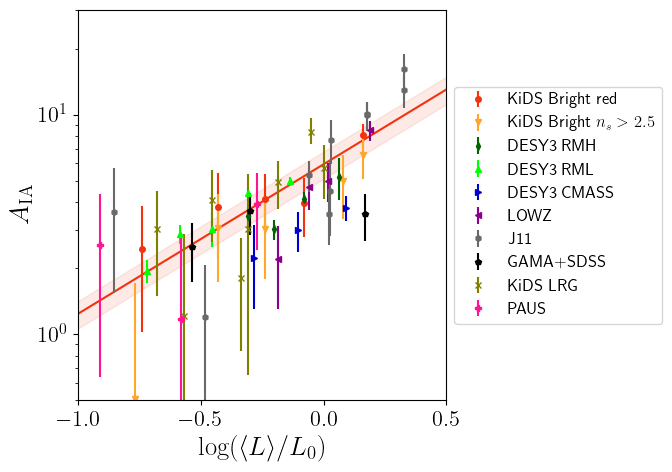

In [12]:
fig, ax = plt.subplots(figsize=(7,5), layout='tight')

# -----------------------------------------------------------------
# Plot theory with shaded error:
# -----------------------------------------------------------------
LoverL0 = np.linspace(0.05, 4, 32)
ax.plot(np.log10(LoverL0), A_IA_L(LoverL0, A0, beta), color='xkcd:vermillion')

y = A_IA_L(LoverL0, A0, beta)
dfdA = y/A0
dfdb = beta*y
A_IA_L_err = np.sqrt((dfdA**2*A0_err**2)+
                     (dfdb**2*beta_err**2) + 
                     2*dfdA*dfdb*A0_beta_covariance)

ax.fill_between(np.log10(LoverL0),
                y+A_IA_L_err,
                y-A_IA_L_err,
                alpha=0.1, color='xkcd:vermillion')
# -----------------------------------------------------------------
# Plot data points
# -----------------------------------------------------------------
ax.errorbar(np.log10(LoL0_G25_red), AIA_G25_red, AIA_G25_red_ERR, ls='', marker='o', markersize=4, c='xkcd:vermillion', label='KiDS Bright red')
ax.errorbar(np.log10(LoL0_G25_hns), AIA_G25_hns, AIA_G25_hns_ERR, ls='', marker='v', markersize=4, c='xkcd:mango', label='KiDS Bright $n_s>2.5$')
ax.errorbar(np.log10(LoL0_RMH), AIA_RMH, (AIA_RMH_UP, AIA_RMH_DOWN), ls='', marker='d', markersize=4, c='darkgreen', label='DESY3 RMH')
ax.errorbar(np.log10(LoL0_RML), AIA_RML, (AIA_RML_UP, AIA_RML_DOWN), ls='', marker='^', markersize=4, c='lime', label='DESY3 RML')
ax.errorbar(np.log10(LoL0_CMASS), AIA_CMASS, (AIA_CMASS_UP, AIA_CMASS_DOWN), ls='', marker='>', markersize=4, c='mediumblue', label='DESY3 CMASS')
ax.errorbar(np.log10(LoL0_LOWZ), AIA_LOWZ, AIA_LOWZ_ERR, ls='', marker='<', markersize=4, c='darkmagenta', label='LOWZ')
ax.errorbar(np.log10(LoL0_J11), AIA_J11, (AIA_J11_UP, AIA_J11_DOWN), ls='', marker='h', markersize=4, c='dimgrey', label='J11')
ax.errorbar(np.log10(LoL0_GAMA), AIA_GAMA, (AIA_GAMA_UP, AIA_GAMA_DOWN), ls='', marker='p', markersize=4, c='black', label='GAMA+SDSS')
ax.errorbar(np.log10(LoL0_KIDS), AIA_KIDS, (AIA_KIDS_UP, AIA_KIDS_DOWN), ls='', marker='x', markersize=4, c='olive', label='KiDS LRG')
ax.errorbar(np.log10(LoL0_PAUS), AIA_PAUS, (AIA_PAUS_UP, AIA_PAUS_DOWN), ls='', marker='P', markersize=4, c='deeppink', label='PAUS')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

ax.set_xlabel(r'$\log(\langle L \rangle/L_0)$')
ax.set_ylabel(r'$A_\mathrm{IA}$')
ax.set_yscale('log')
ax.set_xlim([-1, 0.5])
ax.set_ylim([5e-1, 3e1])